<a href="https://colab.research.google.com/github/sumitgaurav25/python---practice/blob/main/05exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


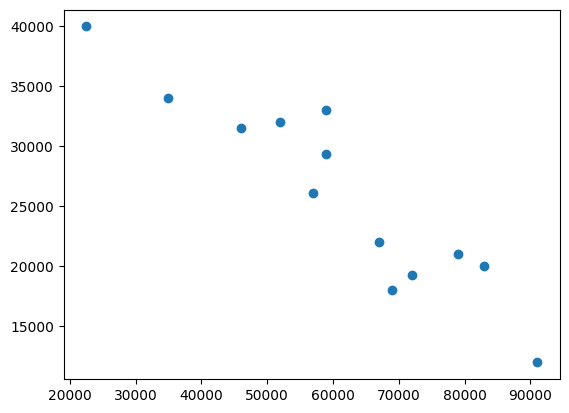

In [4]:
plt.scatter(df.Mileage, df['Sell Price($)'])

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
dfle = df
df['Car Model'] = le.fit_transform(df['Car Model'])
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [13]:
X = df[['Car Model', 'Mileage', 'Age(yrs)']]
X

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [15]:
Y = df['Sell Price($)']
Y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers = [
        ('encoder', OneHotEncoder(sparse_output=False), [0])
    ],
    remainder = 'passthrough'
)

X_encoded = ct.fit_transform(X)

X_encoded = X_encoded[:, 1:]
X_encoded

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [20]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_encoded, Y)

LinearRegression()

In [22]:
reg.predict([[0, 1, 45000, 4]])

array([36991.31721062])

In [23]:
reg.predict([[1, 0, 86000, 7]])

array([11080.74313219])

In [26]:
reg.score(X_encoded, Y)

0.9417050937281082

In [27]:
df = pd.read_csv("School.csv")
df

,ID,Gender,Branch,City,Mode,CGPA
0,1,Male,ECE,Delhi,Online,8.2
1,2,Female,CSE,Mumbai,Offline,9.1
2,3,Male,ME,Chennai,Online,7.5
3,4,Female,ECE,Delhi,Hybrid,8.8
4,5,Male,CSE,Bangalore,Offline,9.0
5,6,Female,EE,Mumbai,Online,8.0
6,7,Male,ECE,Chennai,Hybrid,7.8
7,8,Female,ME,Delhi,Offline,8.6


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle = df
df['Gender'] = le.fit_transform(df['Gender'])
df['Branch'] = le.fit_transform(df['Branch'])
df['City'] = le.fit_transform(df['City'])
df['Mode'] = le.fit_transform(df['Mode'])
dfle

,ID,Gender,Branch,City,Mode,CGPA
0,1,1,1,2,2,8.2
1,2,0,0,3,1,9.1
2,3,1,3,1,2,7.5
3,4,0,1,2,0,8.8
4,5,1,0,0,1,9.0
5,6,0,2,3,2,8.0
6,7,1,1,1,0,7.8
7,8,0,3,2,1,8.6


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['Gender', 'Branch', 'City', 'Mode']

ct = ColumnTransformer(
    transformers = [
        ("encoder", OneHotEncoder(sparse_output=False), categorical_cols)
    ],
    remainder = "passthrough"
)

encoded_data = ct.fit_transform(df)

encoded_df = pd.DataFrame(
    encoded_data,
    columns=ct.get_feature_names_out()
)

encoded_df

,encoder__Gender_0,encoder__Gender_1,encoder__Branch_0,encoder__Branch_1,encoder__Branch_2,encoder__Branch_3,encoder__City_0,encoder__City_1,encoder__City_2,encoder__City_3,encoder__Mode_0,encoder__Mode_1,encoder__Mode_2,remainder__ID,remainder__CGPA
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,8.2
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,9.1
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,7.5
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,8.8
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,9.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,8.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,7.8
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,8.0,8.6
